Building a Machine learning model to predict if the customer will churn or not


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [2]:
url = r"C:\Users\swara_mmys6c\Downloads\Customer_Churn.csv"
df = pd.read_csv(url)

Data preprocessing
Checking for missing values

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Handle missing values if necessary

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.fillna(df.mode(), inplace=True)

Explainatory data analysis (EDA)

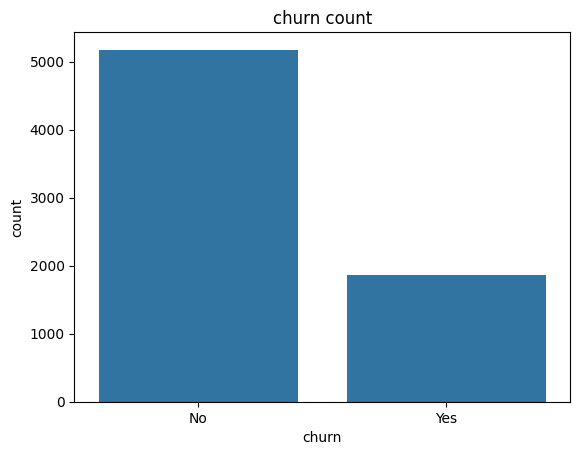

In [6]:
sns.countplot(x='Churn', data=df)
plt.title('churn count')
plt.xlabel('churn')
plt.ylabel('count')
plt.show()


Feature selection Drop non useful columns

In [7]:
df = df.drop(['customerID', 'TotalCharges'], axis=1)

Converting catagorical features to numerical features


In [8]:
df=pd.get_dummies(df, drop_first=True)

Splitting the dataset into features x and target y

In [9]:
x = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

Splitting the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Feature scaling

In [11]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Build the model:Random forest classifier

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Make predictions


In [13]:
y_pred=model.predict(X_test)

Evaluvate the model

Accuracy: 0.7927608232789212
Classification report:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Text(0.5, 1.0, 'Confusion matrix')

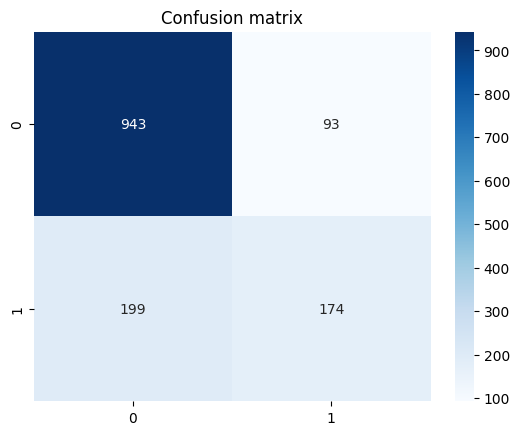

In [14]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')

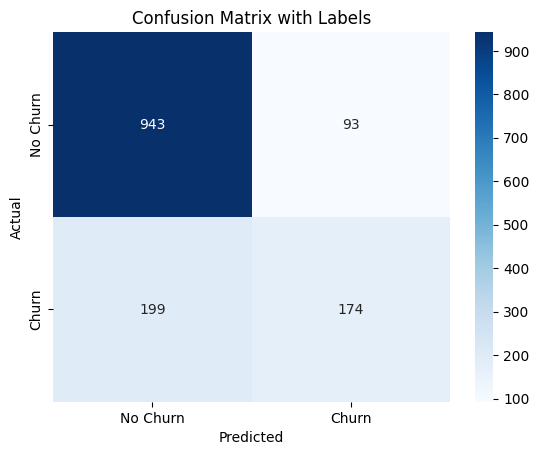

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Labels')
plt.show()

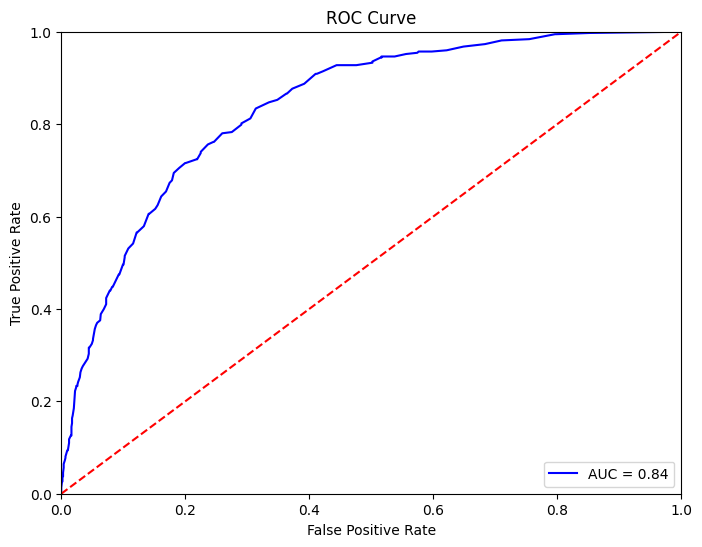

AUC Score: 0.837


In [ ]:
# Import required metrics
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Create ROC curve visualization
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')

Pipeline and Modularity

In [18]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Hyperparameter Tuning


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}


Model Comparison

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    print(f"{name} AUC: {roc_auc_score(y_test, y_proba):.3f}")

Random Forest AUC: 0.837
Logistic Regression AUC: 0.860
XGBoost AUC: 0.838


c:\Users\swara_mmys6c\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:36:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Feature Importance

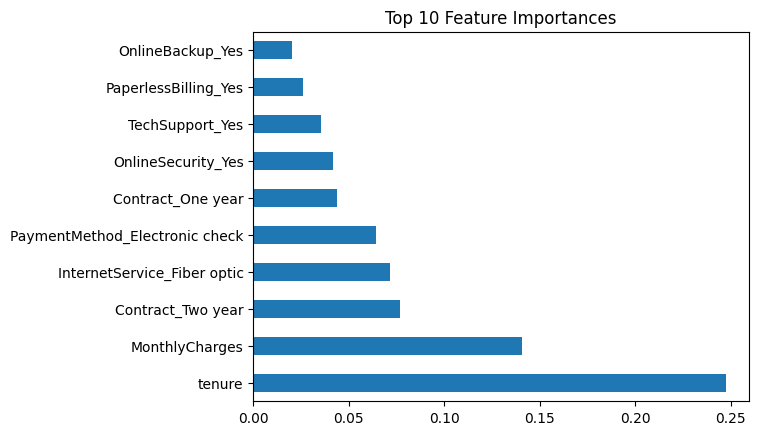

In [22]:
importances = grid.best_estimator_.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(grid.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")

Cross-validated AUC: 0.837 ± 0.011
